<a href="https://colab.research.google.com/github/sajinamatya/Hybrid-Recommendation-System-For-Movies/blob/main/Hybrid_Moive_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hybrid Movie Recommender**





## Name: Sajin Raj Amatya

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import difflib
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk import word_tokenize,sent_tokenize,RegexpTokenizer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from operator import itemgetter

## 1) Data Loading

In [2]:
# loading the csv file using pandas library
movies_dataframe = pd.read_csv("/content/Hybrid-Recommendation-System-For-Movies/netflix_titles.csv")
# inspection for first 3 rows
movies_dataframe.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Information about each column in the dataframe

In [3]:
# pandas info() method
movies_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data types of each columns

In [4]:
movies_dataframe.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


## Total rows and columns

In [5]:
movies_dataframe.shape

(8807, 12)

## Listing out number of uniques values of all columns

In [6]:
print('Unique values')
for column in movies_dataframe.columns:
    unique_data = movies_dataframe[column].nunique()
    print(f" {column}: {unique_data}" )

Unique values
 show_id: 8807
 type: 2
 title: 8807
 director: 4528
 cast: 7692
 country: 748
 date_added: 1767
 release_year: 74
 rating: 17
 duration: 220
 listed_in: 514
 description: 8775


## Listing out the values count for each columns

In [7]:
for column in movies_dataframe.columns:
    unique_data = movies_dataframe[column].value_counts().nlargest(5)
    print('columns :',column)
    print(unique_data )
    print("")

columns : show_id
show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
Name: count, dtype: int64

columns : type
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

columns : title
title
Dick Johnson Is Dead                1
Ip Man 2                            1
Hannibal Buress: Comedy Camisado    1
Turbo FAST                          1
Masha's Tales                       1
Name: count, dtype: int64

columns : director
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64

columns : cast
cast
David Attenborough                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil    14
Samuel West                                                                                10
Jeff Dunham                                                             

## Top 10 movies with the longest title name

In [8]:
descending = movies_dataframe.sort_values(by='title', key=lambda x: x.str.len(), ascending=False)
descending['length_of_title']= descending['title'].str.len()
print(descending[['title','length_of_title']].head(10))

                                                  title  length_of_title
5164  Jim & Andy: The Great Beyond - Featuring a Ver...              104
2813  Ken Burns Presents: College Behind Bars: A Fil...               93
3240  Mike Birbiglia: What I Should Have Said Was No...               88
8462  The Power of Grayskull: The Definitive History...               88
4851  Steve Martin and Martin Short: An Evening You ...               83
3479  Cultivating the Seas: History and Future of th...               79
7774  Power Rangers Samurai: Christmas Together, Fri...               78
2773  Willy and the Guardians of the Lake: Tales fro...               77
1745  Ya no estoy aquí: Una conversación entre Guill...               76
3364  The Road to El Camino: Behind the Scenes of El...               75


## Top 10 movies with the shortest title name

In [9]:
descending = movies_dataframe.sort_values(by='title', key=lambda x: x.str.len(), ascending=False)
descending['length_of_title']= descending['title'].str.len()
print(descending[['title','length_of_title']].tail(5))

     title  length_of_title
4177    IO                2
2069     H                1
7155     K                1
7687     P                1
5958     9                1


## Missing values

In [10]:
movies_dataframe.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


## Rows with the missing Values

In [11]:
movies_dataframe[movies_dataframe.isnull().any(axis=1)].head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...


## Separation of combine genres into separate row for atomicity in data

In [12]:
movies_dataframe['listed_in'] = movies_dataframe['listed_in'].str.split(',')
movies_dataframe = movies_dataframe.explode('listed_in')
movies_dataframe.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,International TV Shows,To protect his family from a powerful drug lor...


## Removing the rows with the wrong rating

In [13]:
movies_dataframe.drop(movies_dataframe[movies_dataframe['rating'].isin(['74 min', '84 min', '66 min'])].index, inplace=True)


In [14]:
movies_dataframe.drop(movies_dataframe[movies_dataframe['listed_in'].isin(['International Movies '])].index, inplace=True)

## Type conversion

In [15]:
movies_dataframe['release_year'] = movies_dataframe['release_year'].astype(str)

## Imputation of missing values

In [16]:
movies_dataframe.fillna({'director':'Not mentioned','cast':'Not mentioned','country':'Not mentioned','rating':'NR','duration':'Not mentioned'},inplace=True)

In [17]:
combined_features = (
    movies_dataframe['title'] + ' ' +
    movies_dataframe['director'] + ' ' +
    movies_dataframe['cast'] + ' ' +
    movies_dataframe['country'] + ' ' +
    movies_dataframe['release_year'] + ' ' +
    movies_dataframe['rating'] + ' ' +
    movies_dataframe['listed_in'] + ' ' +
    movies_dataframe['description']
)
print(combined_features.head(10))

0    Dick Johnson Is Dead Kirsten Johnson Not menti...
1    Blood & Water Not mentioned Ama Qamata, Khosi ...
1    Blood & Water Not mentioned Ama Qamata, Khosi ...
1    Blood & Water Not mentioned Ama Qamata, Khosi ...
2    Ganglands Julien Leclercq Sami Bouajila, Tracy...
2    Ganglands Julien Leclercq Sami Bouajila, Tracy...
2    Ganglands Julien Leclercq Sami Bouajila, Tracy...
3    Jailbirds New Orleans Not mentioned Not mentio...
3    Jailbirds New Orleans Not mentioned Not mentio...
4    Kota Factory Not mentioned Mayur More, Jitendr...
dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-18-8ba28997e1c8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word,y =word_count,palette=colors)


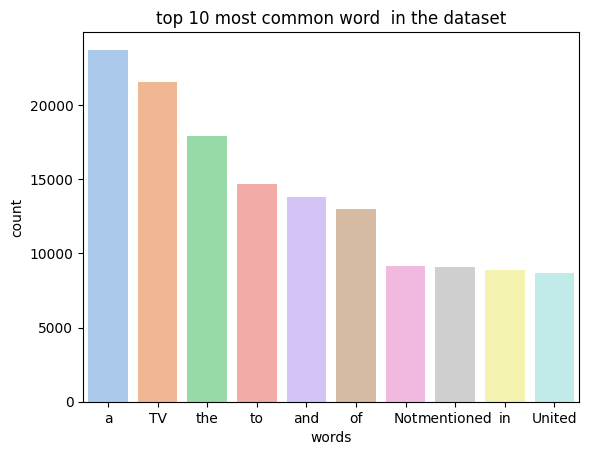

In [18]:
nltk.download('punkt')
text = [sent_tokenize(text) for text in combined_features]
tokenizer = RegexpTokenizer(r'\w+')
text_list=[[tokenizer.tokenize(sentence) for sentence in sentences] for sentences in text]
corpus  = [word for sublist in text_list for sentence in sublist for word in sentence]


def count_graph(corpus):
    counter = Counter(corpus)
    word,word_count  =  [],[]
    most= counter.most_common()
    for i,j in  most[:10]:
        word.append(i)
        word_count.append(j)
    colors = sns.color_palette("pastel", len(word))
    sns.barplot(x=word,y =word_count,palette=colors)
    plt.title("top 10 most common word  in the dataset")
    plt.xlabel("words")
    plt.ylabel("count")

count_graph(corpus)


<ipython-input-19-75df1227c7dc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y,y=x,palette=colors)


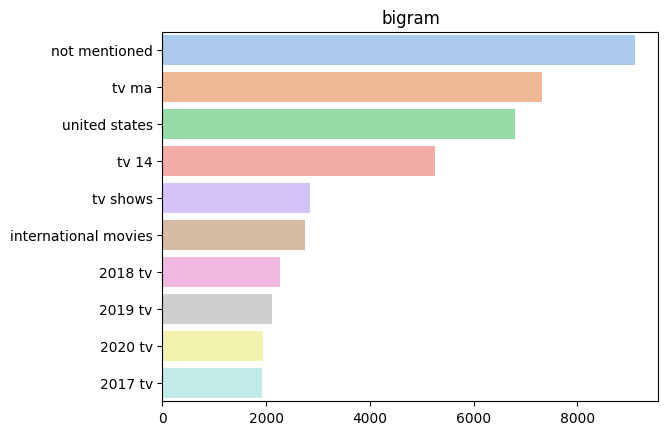

In [19]:
def get_ngram(corpus, n):
    count_vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = count_vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in count_vec.vocabulary_.items()]
    words_freq_s =sorted(words_freq, key = itemgetter(1), reverse=True)

    return words_freq_s[:10]

bigrams = get_ngram(combined_features,2)[:10]
plt.title("bigram")
x,y=map(np.array,zip(*bigrams))
colors = sns.color_palette("pastel", len(x))
sns.barplot(x=y,y=x,palette=colors)
plt.show()

<ipython-input-20-9a0b19effd17>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y,y=x,palette=colors)


<Axes: title={'center': 'Trigram'}>

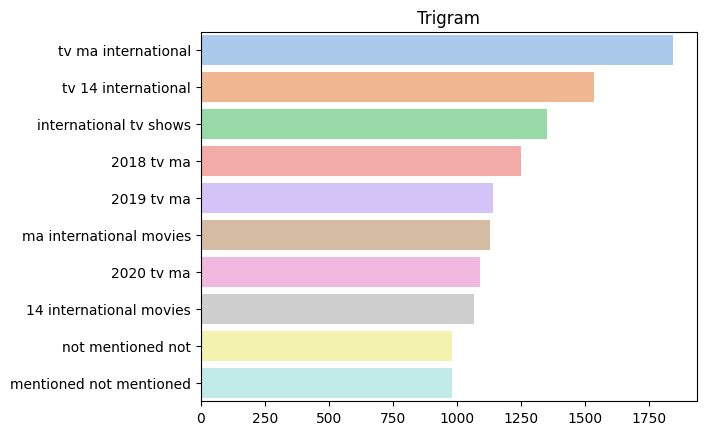

In [20]:
bigrams = get_ngram(combined_features,3)[:10]
plt.title("Trigram")
x,y=map(np.array,zip(*bigrams))
colors = sns.color_palette("pastel", len(x))
sns.barplot(x=y,y=x,palette=colors)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-21-a9c01f3395a1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(x=x,y=y,palette = colors)
<ipython-input-21-a9c01f3395a1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(['Noun', 'proper noun, singular', 'adjective', 'noun plural',


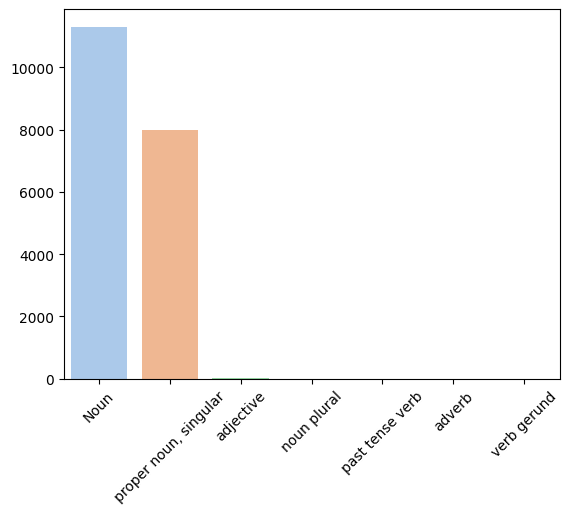

In [21]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
tags= pos_tag(combined_features)
tags=[x for l in tags for x in l]
counter=Counter(tags)
common_tags = counter.most_common(7)
x = [tag[0] for tag in common_tags]
y = [tag[1] for tag in common_tags]
colors = sns.color_palette("pastel", len(x))
s = sns.barplot(x=x,y=y,palette = colors)
s.set_xticklabels(['Noun', 'proper noun, singular', 'adjective', 'noun plural',
                   'past tense verb', 'adverb', 'verb gerund'],rotation =45)
plt.show()

In [22]:
Tfidf_vectorizer = TfidfVectorizer(stop_words='english')
Tfidf_vectorizer_data = Tfidf_vectorizer.fit_transform(combined_features)
print(Tfidf_vectorizer.get_feature_names_out()[:10])

['000' '007' '009' '01' '09' '10' '100' '1000' '100kg' '101']


In [ ]:

TFIDF_vector_similarity = cosine_similarity(Tfidf_vectorizer_data)

In [ ]:
list_genre = movies_dataframe['listed_in'].tolist()

In [ ]:

import difflib

def compare_input(movie_name, list_genre):
    try:
        # Ensure movie_name is a string
        if not isinstance(movie_name, str):
            raise TypeError("movie_name must be a string")

        movie_name = movie_name.lower()

        # Ensure list_genre is a list of strings
        if not isinstance(list_genre, list) or not all(isinstance(genre, str) for genre in list_genre):
            raise TypeError("list_genre must be a list of strings")

        close = difflib.get_close_matches(movie_name, list_genre)
        if not close:
            print(f"No suggestion match found for {movie_name}")
            return []

        close_match = close[0]
        movie_index = movies_dataframe[movies_dataframe['listed_in'].str.contains(close_match, case=False, na=False)].index
        if movie_index.empty:
            print(f"No movie found for the genre, try a different search: {close_match}")
            return []

        index_of_the_movie = movie_index[0]
        similarity_scores = []
        for i, similarity in enumerate(TFIDF_vector_similarity[index_of_the_movie]):
            similarity_scores.append((i, similarity))
        return similarity_scores
    except Exception as e:
        print(f"Error in compare_input: {e}")
        return []


In [ ]:
def display_sugesstion(similarity_scores):
    sorted_similar_movies = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    titles = []
    for i, movie in enumerate(sorted_similar_movies):
        index = movie[0]
        # Check if the movie ID exists before accessing it
        if index in movies_dataframe.index:
            title_from_index = movies_dataframe[movies_dataframe.index == index]['title'].values
            if i < 10:
                titles.append({'title': title_from_index, 'rating': movies_dataframe[movies_dataframe.index == index]['rating'].values})
    return pd.DataFrame(titles)


In [ ]:
genre_rating_matrix = movies_dataframe.pivot_table(index='title', columns='rating', values="listed_in", aggfunc='count', fill_value=0)

print(genre_rating_matrix.head())

In [ ]:
genre_rating_matrix = genre_rating_matrix.reset_index()

In [ ]:
long_format_matrix = genre_rating_matrix.melt(id_vars='title', var_name='rating', value_name='count')

In [ ]:
long_format_matrix.value_counts()


In [ ]:
from surprise import Dataset, Reader

# Define a Reader object for Surprise
reader = Reader(rating_scale=(0, long_format_matrix['count'].max()))
data = Dataset.load_from_df(long_format_matrix[['listed_in', 'rating', 'count']], reader)

# Split the data into training and test sets
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.2)
print(trainset)

In [ ]:
from surprise import SVD

# Build and train the SVD model
model = SVD()
model.fit(trainset)

In [ ]:
all_movies = genre_rating_matrix.columns[1:]
print(all_movies)

In [ ]:
def collaborative_recommendation_for_genre(genre, model, genre_rating_matrix, top_n=10):

    relevant_movies = genre_rating_matrix.loc[genre].index.tolist()

    # Predict ratings for all movies in the dataset
    all_movies = genre_rating_matrix.columns[1:]  # Assuming the columns are movie IDs
    predictions = [model.predict(uid=genre, iid=movie) for movie in all_movies if movie in relevant_movies]

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get top N recommendations
    top_recommendations = [rec.iid for rec in predictions[:top_n]]
    return top_recommendations



In [ ]:
genre_list=genre_rating_matrix['listed_in'].tolist()
print(genre_list)

In [ ]:

def hybrid_recommendation(genre, genre_rating_matrix, movies_dataframe, model, top_n=10):
    # Content-Based Recommendations
    similarity_scores = compare_input(genre, genre_rating_matrix['listed_in'].tolist())
    content_recs_df = display_sugesstion(similarity_scores)

    if content_recs_df.empty:
        print("No content-based recommendations found.")
        return pd.DataFrame()

    # Extract ratings from content-based recommendations
    ratings = content_recs_df['rating'].dropna().tolist()  # Ensure ratings are clean

    # Collaborative Filtering Recommendations
    collab_recs = collaborative_recommendation_for_genre(genre, model, genre_rating_matrix, top_n=10)
    collab_recs_df = pd.DataFrame({'title': collab_recs, 'rating': [None]*len(collab_recs)})

    # Recommend movies with the same ratings


    # Combine and filter recommendations
    combined_recs = pd.concat([content_recs_df, collab_recs_df]).drop_duplicates().reset_index(drop=True)

    print(combined_recs)
    return combined_recs


In [ ]:
while True:
        while True:
            movie_genre = input("Please enter the genre of the movie you are interested in: ")
            if movie_genre.isalpha():  # Allows letters, numbers, and spaces
                collaborative_recommendation_for_genre(movie_genre, model, genre_rating_matrix, top_n=10)
                break
            else:
                print("Invalid input. Please enter only letters, numbers, and spaces.")

        search_again = input("Do you want to search again? (y/n): ").strip().lower()
        if search_again.isalpha() and search_again == 'y' :
          print("please enter y/n")
        elif search_again != 'y':
            print("Thank you for using the movie genre search!")
            break